In [36]:
import random
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [37]:
PI = 3.1415926
e = 2.71828

lower_bound = 0.0
upper_bound = 5.0

### Crude Monte Carlo 
in this section, I used Crude MC to estimte the integral of below function in the range between 0.0 and 5.0 (over d_x)

In [38]:
def f_of_x(x):
    return np.divide(np.exp(-x), (1+np.power(x-1, 2)))

In [39]:
def crude_monte_carlo(num_samples):
    
    sum_samples = 0
    
    for _ in range(num_samples):
        x = np.random.uniform(lower_bound, upper_bound, 1)
        sum_samples += f_of_x(x)
    
    return (upper_bound - lower_bound) * (sum_samples/num_samples)


In [40]:
crude_monte_carlo(num_samples=10000)

array([0.67690952])

In [41]:
def compute_variance_of_crude_MC(num_samples):
    """
        compute ((b-a)/N)(sum_{i=1, N}(f^2(x))) - (b-a/N(sum_{j=1, N}(f(x))))^2
    """
    total_running = 0
    for _ in range(num_samples):
        x = np.random.uniform(lower_bound, upper_bound, 1)
        total_running += f_of_x(x)**2
    sum_of_sqrs = (upper_bound-lower_bound)*(total_running/num_samples)
    
    total_running = 0
    for _ in range(num_samples):
        x = np.random.uniform(lower_bound, upper_bound, 1)
        total_running +=  f_of_x(x)
        
    sqr_of_sum = ((upper_bound-lower_bound)*total_running/num_samples)**2
    
    return sum_of_sqrs - sqr_of_sum

In [42]:
compute_variance_of_crude_MC(num_samples=10000)

array([-0.22656195])

### Importance Sampling

Importance sampling is a method for reducing the variance of a Monte Carlo simulation without increasing the number of samples. The idea is that instead of randomly sampling from the whole function, let’s just sample from a distribution of points similarly shaped to the function.

##### visualization of f(x)

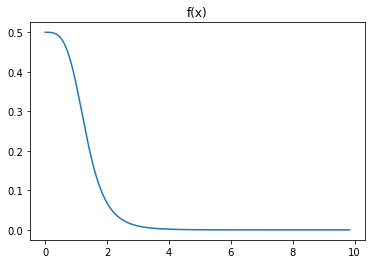

In [43]:
xs = [float(i/50) for i in range(int(50*PI**2))]
y = [f_of_x(x) for x in xs]

plt.plot(xs, y)
plt.title("f(x)")
plt.show()

In [44]:
def g_of_x(x, A, lamda):
    return A * np.power(e, -lamda*x)

In [52]:
def inverse_of_G_of_r(r, lamda):
    return -np.log(float(r))/lamda

In [46]:
def compute_variance_of_importance_sampling(lamda, num_samples):
    
    A = lamda
    
    running_total = 0
    for _ in range(num_samples):
        x = np.random.uniform(lower_bound, upper_bound, 1)
        running_total += (f_of_x(x)**2)/(g_of_x(x, A, lamda))**2
    sum_of_sqrs = running_total/num_samples
    
    running_total = 0
    for _ in range(num_samples):
        x = np.random.uniform(lower_bound, upper_bound, 1)
        running_total += f_of_x(x)/g_of_x(x, A, lamda)
    
    sqr_of_sums = (running_total/num_samples)**2
    
    return sum_of_sqrs - sqr_of_sums



In [49]:
test_lamdas = [i*0.05 for i in range(1, 61)]
variances = []

for i, lamda in enumerate(test_lamdas):
    print(f"lambda {i+1}/{len(test_lamdas)}: {lamda}")
    A = lamda
    variances.append(compute_variance_of_importance_sampling(lamda, 10000))
    clear_output(wait=True)
    


lambda 60/60: 3.0


In [50]:
optimal_lamda = test_lamdas[np.argmin(np.asarray(variances))]
IS_variance = variances[np.argmin(np.asarray(variances))]

print(f"Optimal Lambda: {optimal_lamda}")
print(f"Optimal Variance: {IS_variance}")
print(f"Error: {(IS_variance/10000)**0.5}")

Optimal Lambda: 1.6500000000000001
Optimal Variance: [0.04761334]
Error: [0.00218205]


In [56]:
def importance_sampling_MC(lamda, num_samples):
    A = lamda
    
    running_total = 0
    for _ in range(num_samples):
        r = np.random.uniform(lower_bound, upper_bound, 1)
        running_total += f_of_x(inverse_of_G_of_r(r, lamda))/g_of_x(inverse_of_G_of_r(r, lamda), A, lamda)
    approximation = float(running_total/num_samples)
    return approximation

# run simulation
num_samples = 10000
approx = importance_sampling_MC(optimal_lamda, num_samples)
variance = compute_variance_of_importance_sampling(optimal_lamda, num_samples)
error = (variance/num_samples)**0.5

# display results
print(f"Importance Sampling Approximation: {approx}")
print(f"Variance: {variance}")
print(f"Error: {error}")

Importance Sampling Approximation: 0.2404878408624847
Variance: [0.04882878]
Error: [0.00220972]


Running this code gave me an approximation of 0.6983 which is much closer to the Wolfram-provided grand truth of 0.696.